# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.172147e+01     7.230603e+00
 * time: 0.004109859466552734
     1     2.975892e+01     5.933845e+00
 * time: 0.012174844741821289
     2     2.328346e+01     6.641296e+00
 * time: 0.03174185752868652
     3     1.673930e+01     3.368573e+00
 * time: 0.054825782775878906
     4     1.456184e+01     3.620404e+00
 * time: 0.07419180870056152
     5     1.148648e+01     2.807369e+00
 * time: 0.08942699432373047
     6     1.080597e+01     9.813147e-01
 * time: 0.10483098030090332
     7     9.787940e+00     8.391641e-01
 * time: 0.1207129955291748
     8     9.380249e+00     8.620189e-01
 * time: 0.13672184944152832
     9     9.234772e+00     6.437562e-01
 * time: 0.2364659309387207
    10     9.137080e+00     5.731337e-01
 * time: 0.2516508102416992
    11     9.067794e+00     4.800981e-01
 * time: 0.2665538787841797
    12     9.009826e+00     8.083846e-01
 * time: 0.27768492698669434
    13     8.954894e+00     3.675430e-01
 * time: 

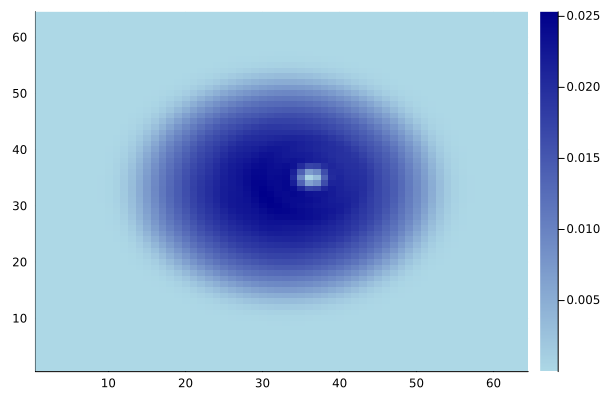

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)